# **Introduction**

This notebook adapts GW data analysis tutorials from multiple sources:
 * 2023 Gravitational Wave Open Data Workshop: https://github.com/gw-odw/odw-2023/tree/main/Tutorials
 * GWpy (user-friendly interface to GW data and analysis, in Python): https://gwpy.github.io/docs/stable/
 * PyCBC (Python-based software for matched-filer GW searches etc.): https://pycbc.org/pycbc/latest/html/
 * LALSuite (GW data analysis tools in C99, including waveform models): https://lscsoft.docs.ligo.org/lalsuite/lalsuite/index.html
 * Bilby (Python-based Bayesian parameter inference): https://lscsoft.docs.ligo.org/bilby/index.html


 Based on a tutorial developed by P. Schmidt.

In [1]:
# Installing the relevant GW software packages...

! pip install -q gwpy==3.0.5

! pip install -q pycbc==2.2.1 lalsuite==7.19

! pip install -q bilby==2.1.2 dynesty==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.7 M

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## **GW Data**

## Accessing GW data

In [3]:
import gwpy
from gwpy.timeseries import TimeSeries

from gwosc.datasets import event_gps

In [4]:
# Retrieving the "trigger" time and data of a GW observation (here: GW150914, the first observation).
gps = event_gps('GW150914')
print("The GPS time of GW150914:", gps)

The GPS time of GW150914: 1126259462.4


In [5]:
# For GW150914, only data from the two LIGO detectors is available. (The analysis of events from later observing runs will also include Virgo data.)
# We select a stretch of 16s around the event "trigger".
ldata = TimeSeries.fetch_open_data('L1', int(gps)-8, int(gps)+8, cache=True)
print("LIGO Livingston strain data of GW150914")
print(ldata)

LIGO Livingston strain data of GW150914
TimeSeries([-7.20738533e-19, -7.69656935e-19, -8.34550390e-19,
            ..., -7.04042575e-19, -7.10036229e-19,
            -7.12193709e-19]
           unit: dimensionless,
           t0: 1126259454.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [6]:
hdata = TimeSeries.fetch_open_data('H1', int(gps)-8, int(gps)+8, cache=True)
print("LIGO Hanford strain data of GW150914")
print(ldata)

LIGO Hanford strain data of GW150914
TimeSeries([-7.20738533e-19, -7.69656935e-19, -8.34550390e-19,
            ..., -7.04042575e-19, -7.10036229e-19,
            -7.12193709e-19]
           unit: dimensionless,
           t0: 1126259454.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


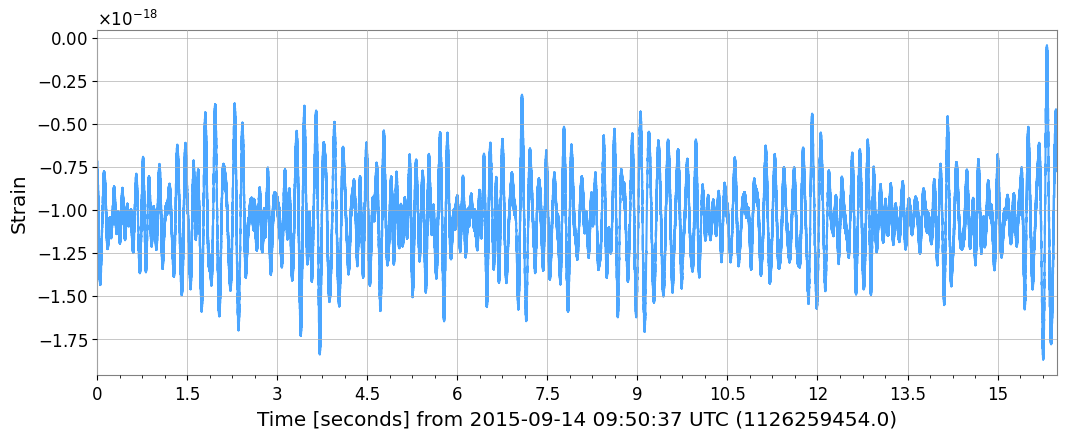

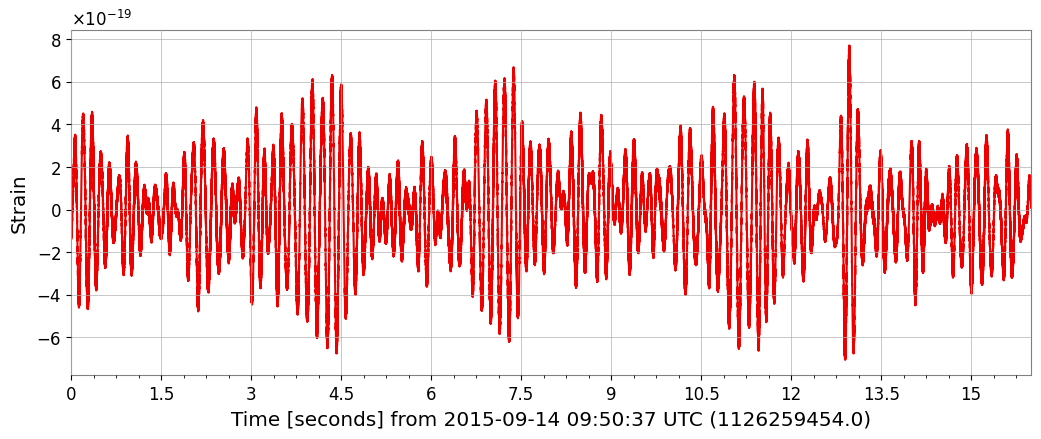

In [7]:
# Visualising the LIGO-Livingston (blue) and LIGO-Hanford (red) data:

plotl = ldata.plot(figsize=(12, 4.8), ylabel='Strain', color='gwpy:ligo-livingston')
plotl.show()

ploth = hdata.plot(figsize=(12, 4.8), ylabel='Strain', color='gwpy:ligo-hanford')
ploth.show()

## Generating a spectrogram of GW data

Spectrograms are useful to show general trends for the change in GW detector sensitivity (i.e., variation in power spectral density) over long chunks of data (much longer than the signal length).

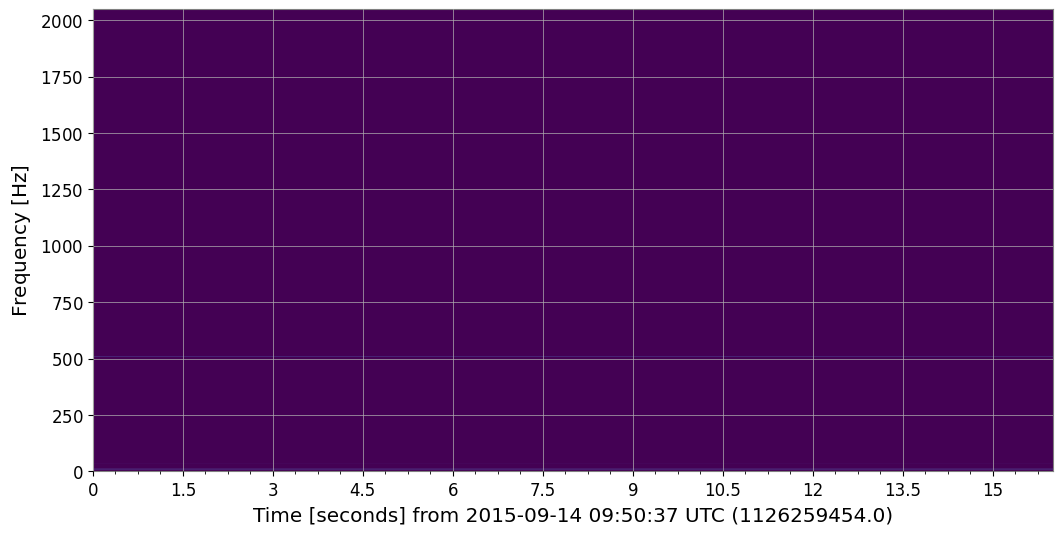

In [12]:
# Spectrograms gives us the FFT of the strain data at each time step on a time-frequency representation.
# The choice of spectrogram method depends on the length of the data chunk.
# The spectrogram output is power spectral density (PSD) per bin; we take the square root to get back to amplitude spectral density (ASD).
# LIGO-Livingston only, but you can do that for the data from all detectors.
specgram = ldata.spectrogram2(fftlength=16, overlap=8, window='hann') ** (1/2.)
plot = specgram.plot();

In [13]:
# Why don't we see a time evolution of the ASD? Check the ASD minimum and maximum to fix the colouring in the display. (Eight orders of magnitude in ASD intensity probably need a log-scale.)
print(specgram.min(), specgram.max())

1.3480104216816901e-27 1 / Hz(1/2) 2.3111413683962574e-19 1 / Hz(1/2)


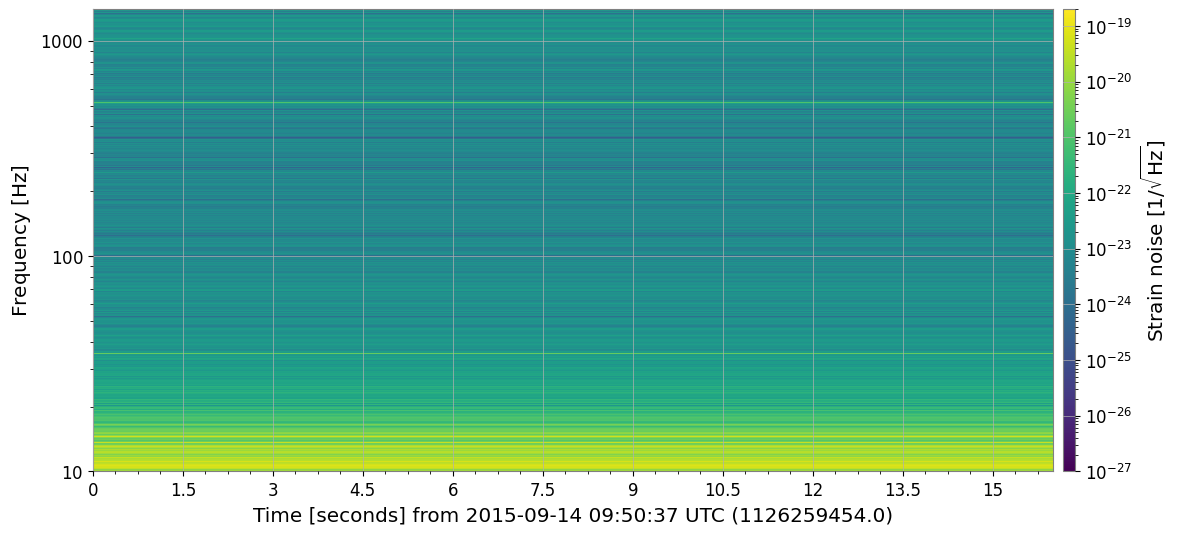

In [14]:
# This tells us how the (noise) ASD for LIGO-Livingston evolved over a 16-second span around GW150914.
# This notebook needs to run in the cloud, but an FFT length of 16s is not ideal for a 16s time span... You can try a much shorter FFT length (1/256) for better resolution.
# You are supposed to notice noise variations at low frequencies but stable high-frequency noise.
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-27, 2e-19),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot

## Q-transform

Because of the particular frequency evolution of GW "chirps" from compact binary mergers, there is no FFT window duration that's appropriate for all frequencies. We need some multi-resolution technique for a time and frequency localization of a GW transient in the detector data.

We will use a special filter ("Q-transform") to create a time-frequency representation of the data that disentangles features at different frequencies, and shows their evolution over very short times. This "detection" method doesn't need much prior knowledge of the signal morphology.

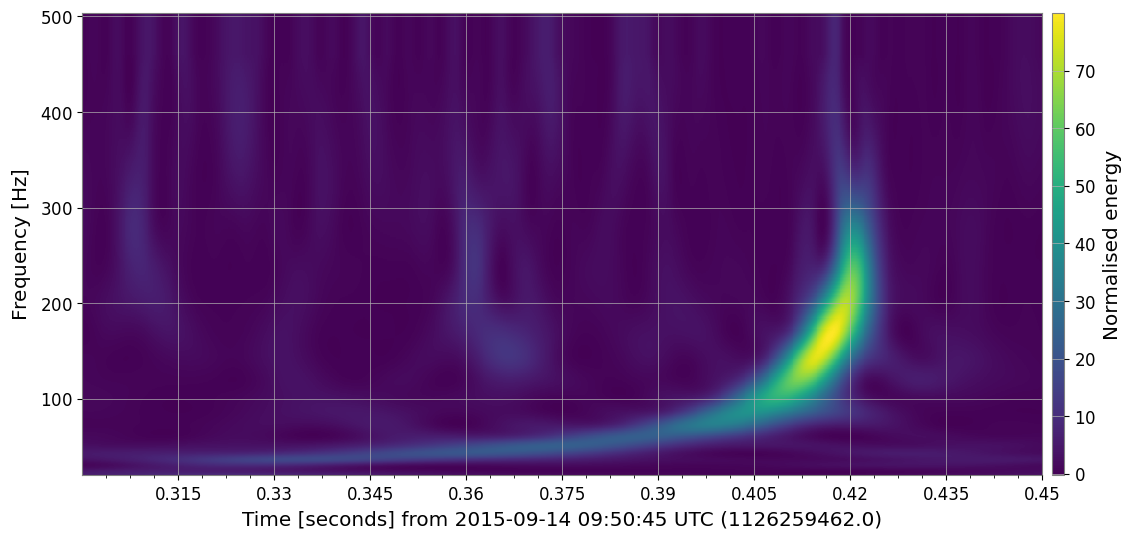

In [ ]:
# We zoom in around the signal in the data chunk.
# The Q-transform returns normalised energy in each bin, so low-frequency noise is surpressed by construction.
# Specific range of "Q" can be chosen to resolve emerging features (not required here).
ldataq = ldata.q_transform(frange=(20, 500), gps=gps, logf=True, outseg=(gps-0.1,gps+0.05))
plot = ldataq.plot()
plot.colorbar(label="Normalised energy");

## PSD Generation

Power spectral density (i.e., sensitivity) of the LIGO detectors during GW150914.

In [15]:
# PS estimate obtained from the median average of overlapping periodograms:
lasd = ldata.asd(fftlength=8, overlap=2, window='tukey', method='median')
hasd = hdata.asd(fftlength=8, overlap=2, window='tukey', method='median')

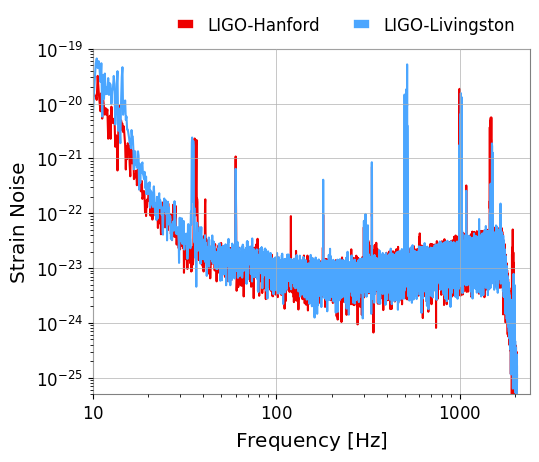

In [18]:
plot = hasd.plot(label='LIGO-Hanford', color='gwpy:ligo-hanford', ylabel='Strain Noise');
ax = plot.gca();
ax.plot(lasd, label='LIGO-Livingston', color='gwpy:ligo-livingston');
ax.set_xlim(10, 2400);
ax.set_ylim(5e-26, 1e-19);
ax.legend(frameon=False, bbox_to_anchor=(1., 1.), loc='lower right', ncol=2);

# **Waveforms**

Matched filtering requires templates of theoretically predicted GW signals. How do we generate waveform templates for compact binary mergers? We use PyCBC, which provides a Python interface to the C-based waveforms library in LALSuite.

In [19]:
import pycbc
from pycbc.waveform import get_td_waveform, get_fd_waveform, td_approximants, fd_approximants

In [20]:
# List of currently available time domain models ("approximants")
print('Time domain waveforms: ', td_approximants())

# List of currently frequency domain models ("approximants")
print('Frequency domain waveforms: ', fd_approximants())

Time domain waveforms:  ['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'SEOBNRv4HM_PA', 'pSEOBNRv4HM_PA', 'IMRPhenomXAS_NRTidalv2', 'IMRPhenomXP_NRTidal

In [21]:
# We first use the SEOBNRv4 approximant to generate a time-domain waveform model with GW150914-like parameters but limited complexity.
# This model provides the dominant (2,|2|) radiation mode of a binary black hole (BBH) with equal masses and aligned spins.
# Returns the h_+ and h_x waveform polarisations, inluding all stages of the binary coalescence (inspiral, merger and ringdown).
#

hp, hc = get_td_waveform(approximant='SEOBNRv4',
                         mass1=30.,
                         mass2=30.,
                         spin1z=-0.2,
                         spin2z=0.5,
                         delta_t=1/4096.,
                         inclination=0.0,
                         f_lower=20.,
                         distance=400.)

In [22]:
get_td_waveform?

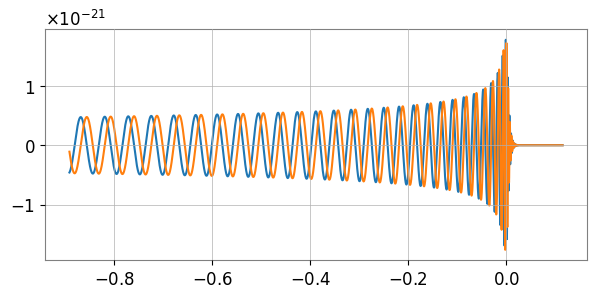

In [23]:
plt.figure(figsize=(7,3));
plt.plot(hp.sample_times, hp);
plt.plot(hc.sample_times, hc);

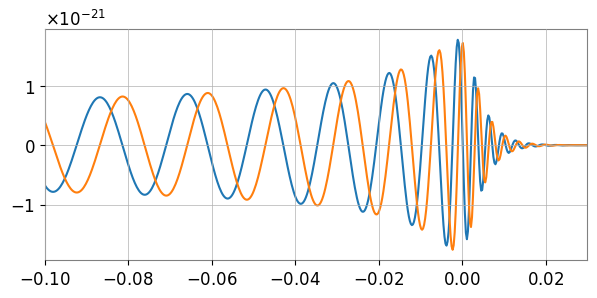

In [24]:
# Zooming into the merger...
plt.figure(figsize=(7,3));
plt.plot(hp.sample_times, hp);
plt.plot(hc.sample_times, hc);
plt.xlim(-0.1, 0.03);

In [31]:
# Let's now generate h+ and hx polarisations for the same configuration (and the same assumptions on physical complexity) but with a frequency-domain model.

hpf, hcf = get_fd_waveform(approximant='IMRPhenomXAS',
                         mass1=30.,
                         mass2=30.,
                         spin1z=-0.2,
                         spin2z=0.5,
                         delta_f=1/4.,
                         inclination=0.0,
                         f_lower=20.,
                         distane=400.)

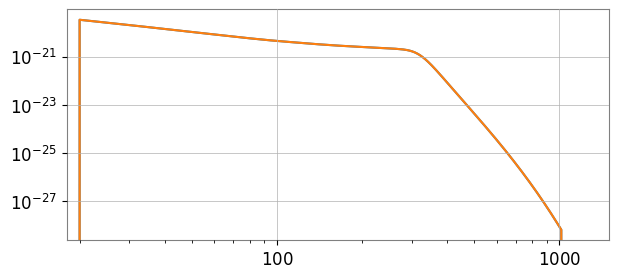

In [32]:
plt.figure(figsize=(7,3));
plt.loglog(hpf.sample_frequencies, abs(hpf));
plt.loglog(hcf.sample_frequencies, abs(hcf));
plt.xlim(18.,1500.);

In [38]:
# We now introduce spin precession (i.e., arbitrarily oriented spins of the black holes) with the frequency-domain model IMRPhenomXP.
# NOTE: To better visualize the differences between h_+ and h_x, we choose a mass ratio of 3 and a close to edge-on binary inclination.

hpfP, hcfP = get_fd_waveform(approximant='IMRPhenomXP',
                         mass1=30.,
                         mass2=10.,
                         spin1x=0.7,
                         spin1y=0.0,
                         spin1z=-0.2,
                         spin2x=-0.4,
                         spin2y=0.0,
                         spin2z=0.5,
                         delta_f=1/4.,
                         inclination=np.deg2rad(76.),
                         f_lower=20.,
                             distance=400.)

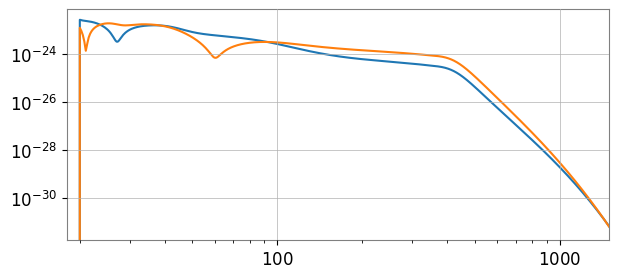

In [39]:
plt.figure(figsize=(7,3));
plt.loglog(hpfP.sample_frequencies, abs(hpfP));
plt.loglog(hcfP.sample_frequencies, abs(hcfP));
plt.xlim(18.,1500.);

In [40]:
# How does this waveform look in the time domain?

hpP, hcP = get_td_waveform(approximant='IMRPhenomXP',
                         mass1=30.,
                         mass2=10.,
                         spin1x=0.7,
                         spin1y=0.0,
                         spin1z=-0.2,
                         spin2x=-0.4,
                         spin2y=0.0,
                         spin2z=0.5,
                         delta_t=1/4096.,
                         inclination=np.deg2rad(76.),
                         f_lower=20.,
                             distance=400.)



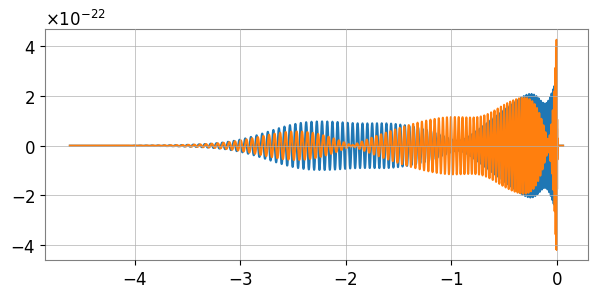

In [41]:
plt.figure(figsize=(7,3));
plt.plot(hpP.sample_times, hpP);
plt.plot(hcP.sample_times, hcP);

In [42]:
# We now want to project our waveform template onto a GW detector (e.g., LIGO-Hanford), to estimate the detector response for this theoretical prediction of a GW signal.
# For this, we need to know the antenna patterns of individual detectors, which we get from the PyCBC "detector" module.

from pycbc.detector import Detector

# Initialise the Hanford detector:
detH = Detector("H1")

# The antenna pattern functions for each detector depend on the sky locations (RA, DEC), the polarisation angle and the GPS time.
# This example uses the oreviously defined GPS time of GW150914, but the sky localition and polarisation angle have been chosen arbitrarily.

ra   = 1.7  # right ascension
dec  = 0.6  # declination
pol  = 0.56  # polarisation angle

fpH, fcH = detH.antenna_pattern(ra, dec, pol, gps)
print("Hanford: fp={}, fc={}".format(fpH, fcH))

Hanford: fp=-0.5617882242203172, fc=0.2428317635324794


In [43]:
# By construction, waveforms in LALSuite have their peak emission at t=0 (see above), so we need to shift the previously generated time arrays for h_+ and h_x to match the GPS time:
hpP.start_time += gps
hcP.start_time += gps

# The GW strain measured in each detector is constructed by convoluting the GW polarisations and the antenna pattern functions: h(t) = h_+ * F_+ + h_x * F_x
htH = fpH * hpP + fcH * hcP

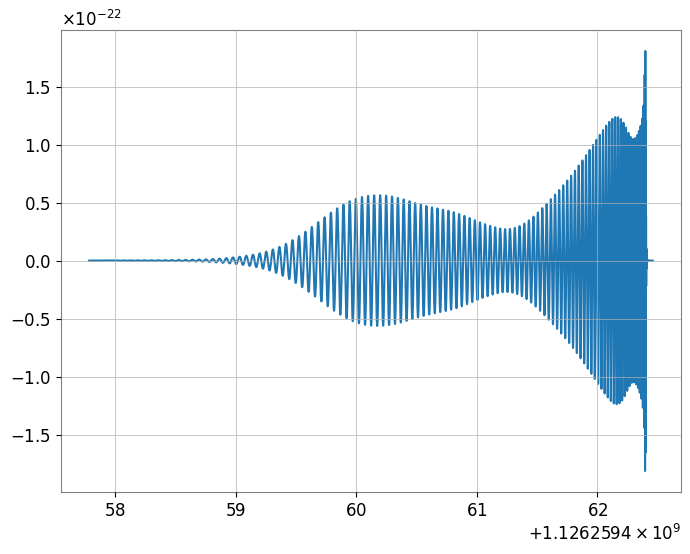

In [44]:
# We plot the strain (associated with the precessing waveform template from above), observed with LIGO-Hanford and assuming zero noise:

plt.figure(figsize=(8,6));
plt.plot(htH.sample_times, htH.data);

# **Parameter Estimation**

In [ ]:
import bilby
from bilby.core.prior import Uniform, PowerLaw
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

## Example: GW150914

In [ ]:
# Setting up a detector network by initialising the (empty) detector objects in Bilby.

H1 = bilby.gw.detector.get_empty_interferometer("H1")
L1 = bilby.gw.detector.get_empty_interferometer("L1")

In [ ]:
# We want to analyse GW150914 data, but choosing a smaller chnk of data than before.
# First, we define the times we want to analyse relative to the time of the event (total duration of the data chunk and time after the event trigger).

post_trigger_duration = 2.0
duration = 4.0
analysis_start = gps + post_trigger_duration - duration

# We again use GWPy to fetch published LIGO data around GW150914.
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

L1_analysis_data = TimeSeries.fetch_open_data(
    "L1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)


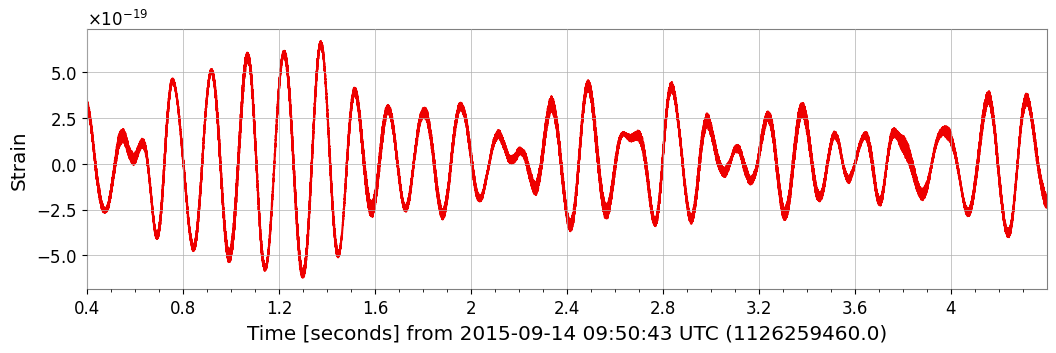

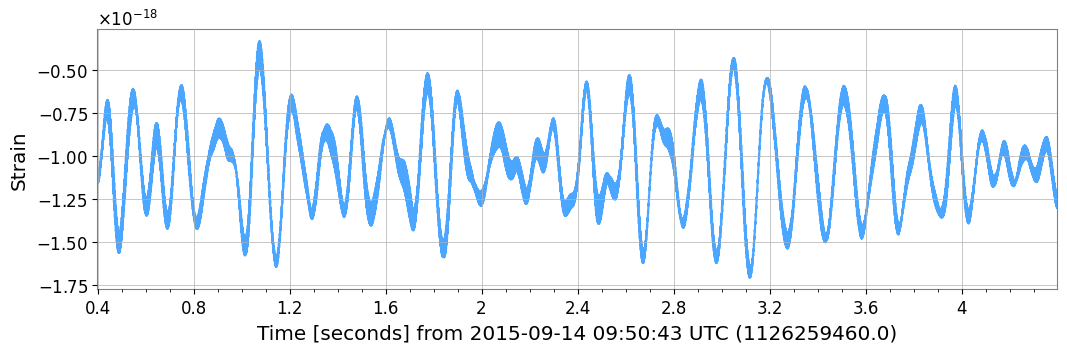

In [ ]:
# Visualising the stretch of data under analysis...

H1_analysis_data.plot(ylabel='Strain', color='gwpy:ligo-hanford');
L1_analysis_data.plot(ylabel='Strain', color='gwpy:ligo-livingston');

In [ ]:
# Passing the selected strain data to the corresponding interferometer objects

H1.set_strain_data_from_gwpy_timeseries(H1_analysis_data)
L1.set_strain_data_from_gwpy_timeseries(L1_analysis_data)

In [ ]:
# We generate the noise power spectral density (PSD) in the detectors using the Welch method.
# We download a longer stretch of data around the data that we analyse. (This ensures that sufficient data in which no signal is present.)

psd_duration = duration * 32
psd_start_time = analysis_start - psd_duration

H1_psd_data = TimeSeries.fetch_open_data(
    "H1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)

L1_psd_data = TimeSeries.fetch_open_data(
    "L1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)


In [ ]:
# We use GWPy to generate the PSD. PyCBC also has implementations of the Welch method (see docs).

psd_alpha = 2.0 * H1.strain_data.roll_off / duration

H1_psd = H1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")
L1_psd = L1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")

In [ ]:
# Storing the PSDin the interferometer objects.

H1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=H1_psd.value)

L1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=L1_psd.value)

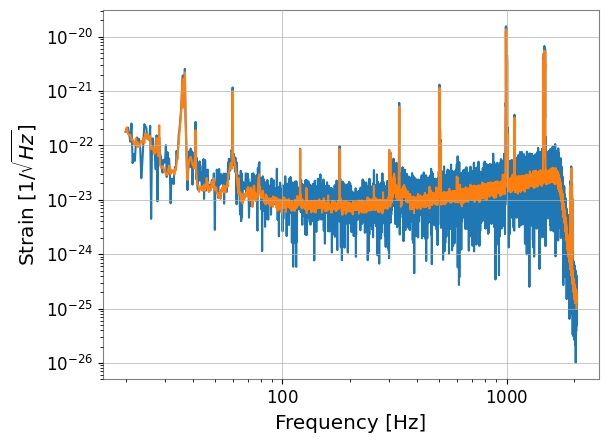

In [ ]:
# Visualising the strain data and the amplitude spectral density: (ASD) = \sqrt(PSD)

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # (We filter for the frequencies that we'll use in the analysis.)
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]))
ax.loglog(H1.power_spectral_density.frequency_array[idxs],
          H1.power_spectral_density.asd_array[idxs])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [1/$\sqrt{Hz}$]")
plt.show()

In [ ]:
# Bayesian parameter inference needs parameter priors.
# For a simplified (and quick) analysis, assume non-spinning.

prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = Uniform(name='chirp_mass', minimum=30.0,maximum=32.5)
prior['mass_ratio'] = Uniform(name='mass_ratio', minimum=0.5, maximum=1)
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=gps-0.1, maximum=gps+0.1)
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
prior['dec'] =  -1.2232
prior['ra'] =  2.19432
prior['theta_jn'] =  1.89694
prior['psi'] =  0.532268
prior['luminosity_distance'] = PowerLaw(alpha=2, name='luminosity_distance', minimum=50, maximum=2000, unit='Mpc', latex_label='$d_L$')

In [ ]:
# Next, we set up the likelihood object that evaluates the likelihood for the analysed strain data given some waveform model (template) and specific source parameters.

# First, we set up the list of interferometers we want to include in the likelihood calculation
interferometers = [H1, L1]

# Then we set up the waveform generator that specifies our templates. We choose a (computationally efficient) frequency-domain model that is valid
# for the dominant radiation mode of a BBH merger with precessing spins.
# NOTE: In the presence of precession, some reference frequency needs to specified for the evolving spin orientation.
# NOTE: Bilby calls LALSuite under the hood.
waveform_arguments = dict(
    waveform_approximant='IMRPhenomXP', reference_frequency=100., catch_waveform_errors=True)

# We create the waveform_generator object.
# (This also takes care of converting between parameters in different steps of the analysis, e.g., from component masses to total mass and mass ratio, etc.)
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

# Finally, we create the likelihood using the GravitationalWaveTransient class.
# This computes the log-likelihood in the frequency domain assuming a colored Gaussian noise model described by a PSD.
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, waveform_generator, priors=prior,
    time_marginalization=True, phase_marginalization=True, distance_marginalization=True)

13:16 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
13:16 bilby INFO    : Distance marginalisation file .distance_marginalization_lookup.npz does not exist
13:16 bilby INFO    : Building lookup table for distance marginalisation.


  0%|          | 0/400 [00:00<?, ?it/s]

In [ ]:
# Now we sample!

result_short = bilby.run_sampler(
    likelihood,
    prior,
    sampler='dynesty', # Bilby is using a specific implementation of Dynesty, e.g., with custom stepping methods for the MCMC evolution.
    outdir='short',
    label="GW150914",
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters,
    nlive=250,
    dlogz=1.,  # <- We want to make the analysis fast. A realistic setting for the final remaining log evidence would be 0.1
    clean=True,
)


13:20 bilby INFO    : Running for label 'GW150914', output will be saved to 'short'
13:20 bilby INFO    : Using lal version 7.3.1
13:20 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
13:20 bilby INFO    : Using lalsimulation version 5.2.1
13:20 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
13:20 bilby INFO    : Analysis priors:
13:20 bilby INFO    : chirp_mass=Uniform(minimum=30.0, maximum=32.5, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
13:20 bilby INFO    : mass_ratio=Uniform(mi

1it [00:00, ?it/s]

13:28 bilby INFO    : Written checkpoint file short/GW150914_resume.pickle
13:28 bilby INFO    : Rejection sampling nested samples to obtain 275 posterior samples
13:28 bilby INFO    : Sampling time: 0:06:59.778450
13:28 bilby INFO    : Computing per-detector log likelihoods.


  0%|          | 0/275 [00:00<?, ?it/s]

13:29 bilby INFO    : Reconstructing marginalised parameters.


  0%|          | 0/275 [00:00<?, ?it/s]

13:29 bilby INFO    : Generating sky frame parameters.


  0%|          | 0/275 [00:00<?, ?it/s]

13:29 bilby INFO    : Computing SNRs for every sample.


  0%|          | 0/275 [00:00<?, ?it/s]

13:30 bilby INFO    : Summary of results:
nsamples: 275
ln_noise_evidence: -17273.289
ln_evidence: -16988.719 +/-  0.205
ln_bayes_factor: 284.569 +/-  0.205



In [ ]:
# The posterior samples for all parameters are stored as panda data frames.
# Including converted parameters and computed SNR and likelihood values for each sample.
result_short.posterior.keys()

Index(['chirp_mass', 'mass_ratio', 'time_jitter', 'phase', 'geocent_time',
       'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'dec', 'ra',
       'theta_jn', 'psi', 'luminosity_distance', 'log_likelihood', 'log_prior',
       'reference_frequency', 'waveform_approximant', 'minimum_frequency',
       'total_mass', 'mass_1', 'mass_2', 'H1_log_likelihood',
       'L1_log_likelihood', 'H1_matched_filter_snr', 'H1_optimal_snr',
       'L1_matched_filter_snr', 'L1_optimal_snr', 'symmetric_mass_ratio',
       'iota', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y',
       'spin_2z', 'phi_1', 'phi_2', 'chi_eff', 'chi_1_in_plane',
       'chi_2_in_plane', 'chi_p', 'cos_tilt_1', 'cos_tilt_2', 'redshift',
       'comoving_distance', 'mass_1_source', 'mass_2_source',
       'chirp_mass_source', 'total_mass_source'],
      dtype='object')

In [ ]:
# Full list of samples:
result_short.posterior


,chirp_mass,mass_ratio,time_jitter,phase,geocent_time,a_1,a_2,tilt_1,tilt_2,phi_12,...,chi_2_in_plane,chi_p,cos_tilt_1,cos_tilt_2,redshift,comoving_distance,mass_1_source,mass_2_source,chirp_mass_source,total_mass_source
0,30.041780,0.678949,0.000193,4.772367,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.057951,252.989373,39.734253,26.977545,28.396182,66.711798
1,31.238189,0.685616,0.000193,1.434140,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.061753,269.337517,40.960552,28.083197,29.421346,69.043750
2,30.412950,0.855448,-0.000030,1.701641,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.062887,274.212013,35.558618,30.418556,28.613523,65.977174
3,31.648187,0.832879,-0.000155,4.432020,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.067966,295.994195,37.330947,31.092173,29.634082,68.423119
4,31.624233,0.812773,0.000009,1.259722,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.067564,294.271714,37.784460,30.710199,29.622804,68.494659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,31.033515,0.957777,-0.000013,4.675572,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.061848,269.748921,34.305405,32.856921,29.225941,67.162326
282,31.036862,0.974922,-0.000015,4.706293,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.062378,272.023972,33.988091,33.135752,29.214523,67.123843
283,31.112913,0.975535,-0.000102,4.551431,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.064594,281.539318,33.989729,33.158184,29.225137,67.147913
284,31.038179,0.966670,-0.000041,4.787304,1.126259e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.064426,280.817374,34.069051,32.933541,29.159546,67.002592


In [ ]:
Mtot = result_short.posterior["total_mass"].values

In [ ]:
# Compute the 90% credible interval and the median of the total mass distribution:

lower_bound = np.quantile(Mtot, 0.05)
upper_bound = np.quantile(Mtot, 0.95)
median = np.quantile(Mtot, 0.5)
print("Mtot = {} with a 90% C.I = {} -> {}".format(median, lower_bound, upper_bound))


Mtot = 71.54973065731639 with a 90% C.I = 70.7255397939141 -> 72.54636959641927


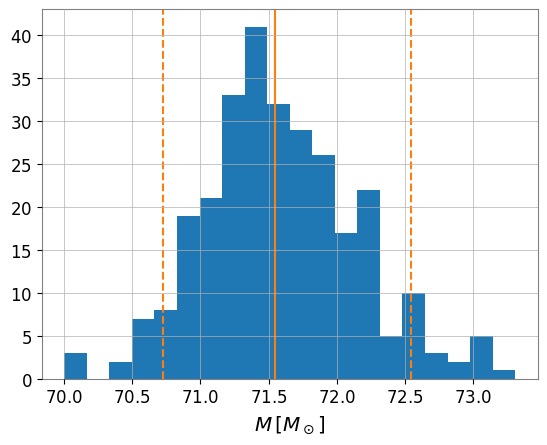

In [ ]:
plt.hist(result_short.posterior["total_mass"], bins=20);
plt.axvline(lower_bound, ls='--', color='C1');
plt.axvline(upper_bound, ls='--', color='C1');
plt.axvline(median, color='C1');
plt.xlabel(r'$M\, [M_\odot]$');

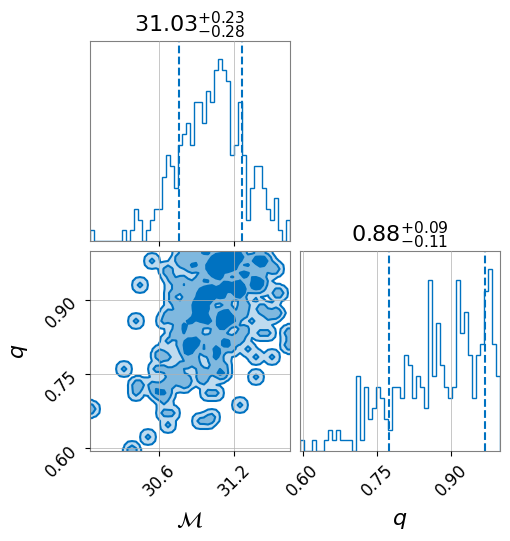

In [ ]:
#1D and 2D posteriors for the chirp mass and mass ratio.
result_short.plot_corner(parameters=["chirp_mass", "mass_ratio"], prior=True)